In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [21]:
# Load dataset
data = pd.read_csv('dataset2.txt', delim_whitespace=True)
data.head()

,feature1,feature2,class
0,-0.764,1.13,1.0
1,4.330,2.92,2.0
2,2.530,2.17,2.0
3,1.860,2.05,1.0
4,0.617,2.01,2.0


# Split dataset into training and test sets

In [22]:
# Split dataset into training and test sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

In [23]:
train_data

,feature1,feature2,class
674,0.6730,0.560,2.0
1699,0.2590,1.510,2.0
1282,0.6080,2.290,1.0
1315,2.1300,2.180,2.0
1210,2.2200,1.410,1.0
...,...,...,...
70,-0.0135,0.531,1.0
610,0.8530,1.560,1.0
1174,1.5400,0.527,2.0
1923,0.1350,1.260,1.0


# Define the Naive Bayes classifier

In [24]:
def naive_bayes_classifier(x):
    pdf1 = norm.pdf(x[0], loc=mu1[0], scale=sigma1[0]) * norm.pdf(x[1], loc=mu1[1], scale=sigma1[1])
    pdf2 = norm.pdf(x[0], loc=mu2[0], scale=sigma2[0]) * norm.pdf(x[1], loc=mu2[1], scale=sigma2[1])
    if pdf1 * p1 > pdf2 * p2:
        return 1
    else:
        return 2

# Compute the ML Estimate for the class

In [25]:
# Compute prior probabilities
class_counts = train_data['class'].value_counts()
class_probs = class_counts / len(train_data)

# Compute likelihood probabilities using Naive Bayes assumption
class_means = []
class_vars = []

for label in range(1, len(class_probs)+1):
    class_data = train_data[train_data['class'] == label][['feature1', 'feature2']]
    class_means.append(np.mean(class_data, axis=0))
    class_vars.append(np.var(class_data, axis=0))
    
# Compute ML estimates of the class priors
p1 = train_data['class'].value_counts()[1] / len(train_data)
p2 = train_data['class'].value_counts()[2] / len(train_data)

# Compute ML estimates of the class conditional distributions
X1 = train_data[train_data['class'] == 1][['feature1', 'feature2']]
X2 = train_data[train_data['class'] == 2][['feature1', 'feature2']]
mu1 = X1.mean().values
mu2 = X2.mean().values
sigma1 = X1.std().values
sigma2 = X2.std().values

# contour and desicion boundary plot

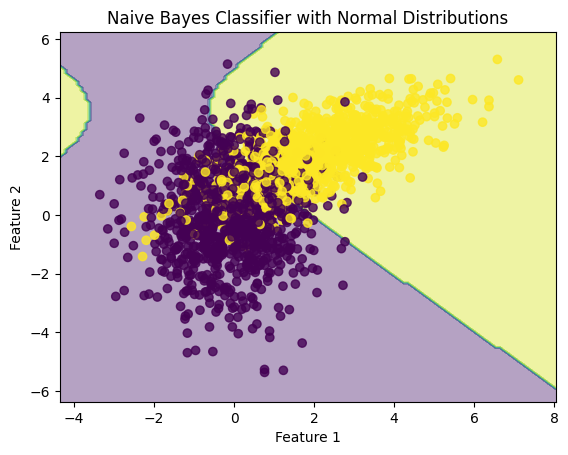

In [26]:
# Create a meshgrid of points
x_min, x_max = data['feature1'].min() - 1, data['feature1'].max() + 1
y_min, y_max = data['feature2'].min() - 1, data['feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([naive_bayes_classifier([x1, x2]) for x1, x2 in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and contours
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(data['feature1'], data['feature2'], c=data['class'], alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Classifier with Normal Distributions')
plt.show()

In [27]:
# Compute the accuracy on the test set
y_true = test_data['class'].values
y_pred = test_data[['feature1', 'feature2']].apply(naive_bayes_classifier, axis=1).values
accuracy = np.sum(y_true == y_pred) / len(y_true)
print('Accuracy:', accuracy)

Accuracy: 0.8375


# confusion Matrix

In [28]:
# Define function to compute posterior probabilities
def compute_posterior(x):
    posteriors = []
    for label in range(1, len(class_probs)+1):
        prior = class_probs[label]
        likelihood = np.exp(-(x - class_means[label-1])**2 / (2 * class_vars[label-1]))
        posterior = prior * np.prod(likelihood)
        posteriors.append(posterior)
    return np.argmax(posteriors) + 1

# Apply Naive Bayes classifier to test set
test_data['predicted_class'] = test_data[['feature1', 'feature2']].apply(compute_posterior, axis=1)
test_data['predicted_class'] = test_data['predicted_class'].astype(float)

# Evaluate performance using confusion matrix
confusion_matrix = pd.crosstab(test_data['class'], test_data['predicted_class'], rownames=["True"], colnames=["Predicted"])
print(confusion_matrix)


Predicted  1.0  2.0
True               
1.0        165   26
2.0         36  173


# a summary of the steps involved in implementing Naive Bayes classification and evaluating its performance on the dataset:

Load the dataset from the dataset1.csv file using the pandas.read_csv() function, and split the dataset into training and test sets using the pandas.DataFrame.sample() method with an 80-20 split.

Convert the categorical class labels into numerical labels using the pandas.factorize() function, which assigns a unique integer to each category.

Compute the prior probabilities of the classes by counting the number of samples in each class and dividing by the total number of samples in the training set.

Compute the likelihood probabilities of the features for each class using the Naive Bayes assumption, which assumes that the features are conditionally independent given the class label. To compute the likelihood probabilities, we need to estimate the mean and variance of each feature for each class, which can be done using the numpy.mean() and numpy.var() functions.

Define a function to compute the posterior probabilities of the classes for a given data point, using Bayes' rule and the ML estimators for the prior and likelihood probabilities.

Apply the Naive Bayes classifier to the test set by calling the compute_posterior() function on each test data point, and comparing the predicted class label with the true class label.

Evaluate the performance of the classifier by computing the confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives. This can be done using the pd.crosstab() function from the pandas library.

Overall, Naive Bayes classification is a simple and efficient classification algorithm that is often used for text classification, spam filtering, and other applications where the features are categorical or discrete. It assumes that the features are conditionally independent given the class label, which allows for fast and efficient computation of the likelihood probabilities. However, this assumption may not hold in practice for some datasets, and other classification algorithms may be more appropriate.